In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
df_org = pd.read_csv("Sparkling.csv")

In [13]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [30]:
df_org.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [8]:
df = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

In [11]:
df.head()

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

In [14]:
## Reading the data as a monthly Time Series from the '.csv' file.

In [15]:
df_1 = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

In [16]:
print(df_1.head())
print(df_1.tail())

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64
YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64


In [18]:
df_2 = pd.read_csv("Sparkling.csv")

In [20]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [21]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [22]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [24]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [25]:
## Plot the Time Series to understand the behaviour of the data

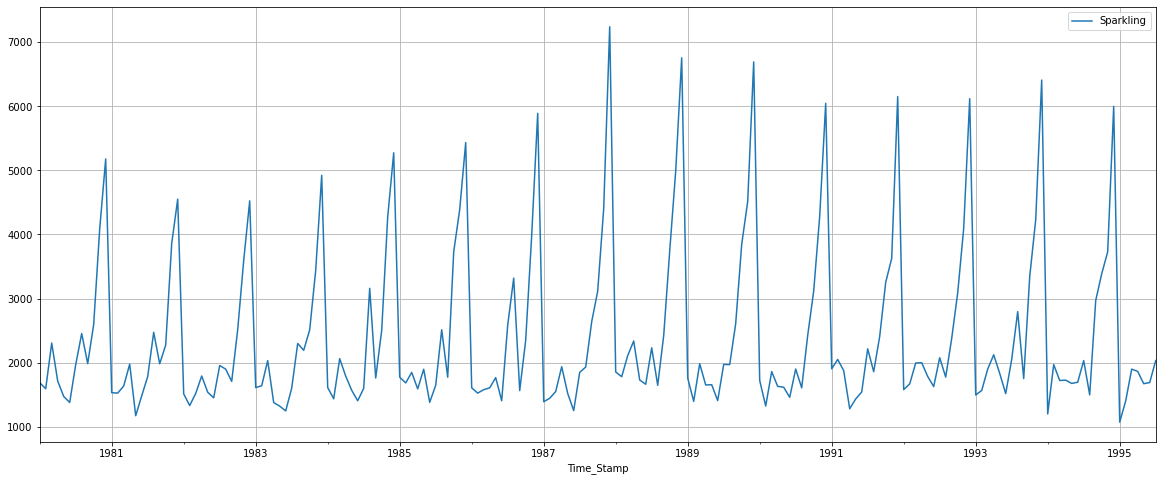

In [32]:
df.plot(figsize=(20,8))
plt.grid();

In [33]:
#descriptive statistics of the Time Series

In [34]:
round(df.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


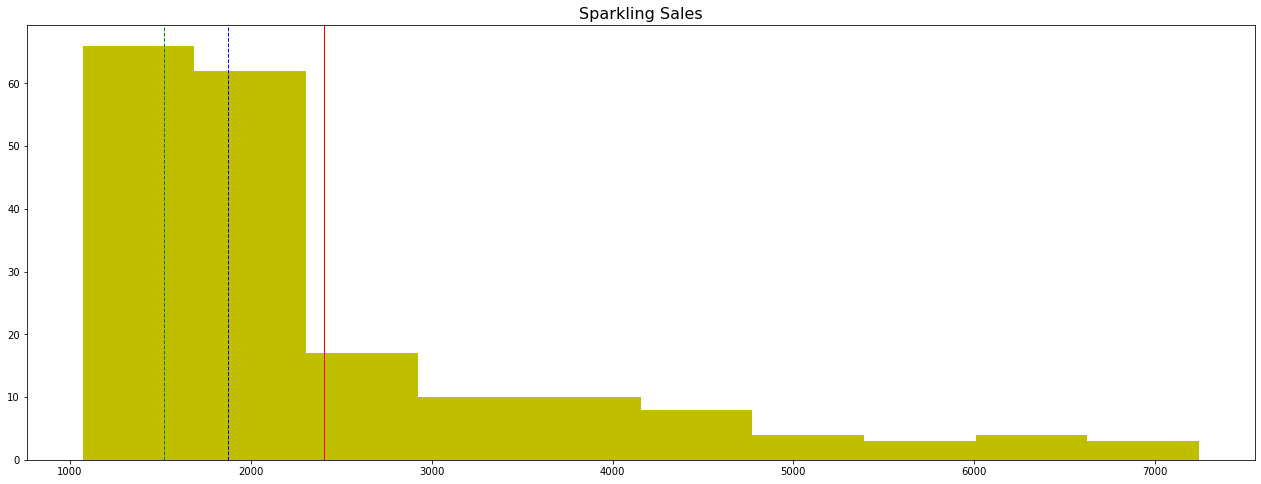

In [62]:
plt.figure(figsize=(22,8))
plt.title('Sparkling Sales',fontsize=16)
plt.hist(df['Sparkling'], color='y') 
plt.axvline(df['Sparkling'].mean(), color='r', linewidth=1)
plt.axvline(df['Sparkling'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Sparkling'].mode()[0], color='g', linestyle='dashed', linewidth=1)

### Yearly Boxplot

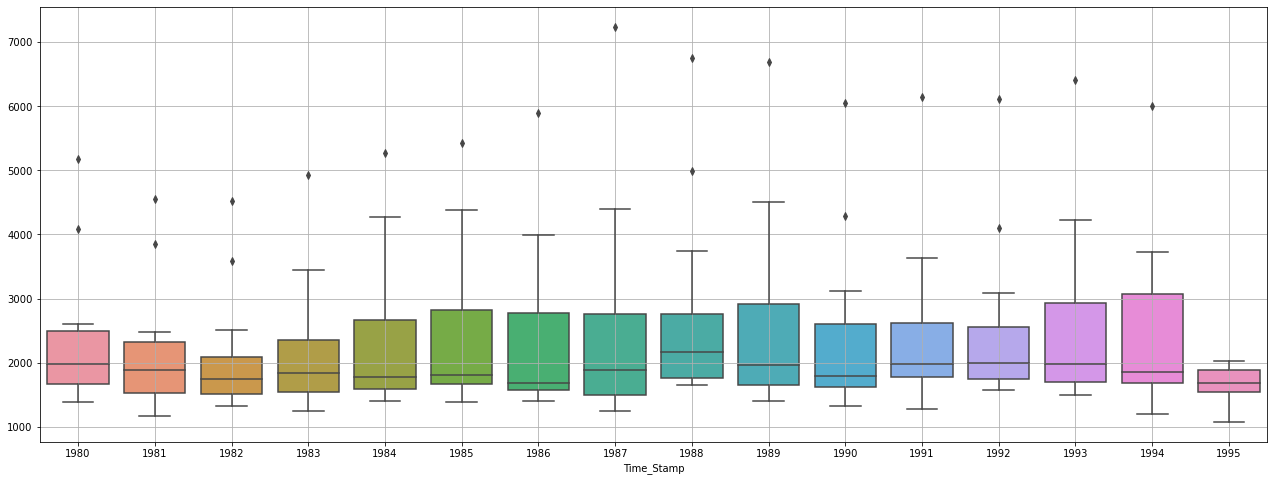

In [36]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

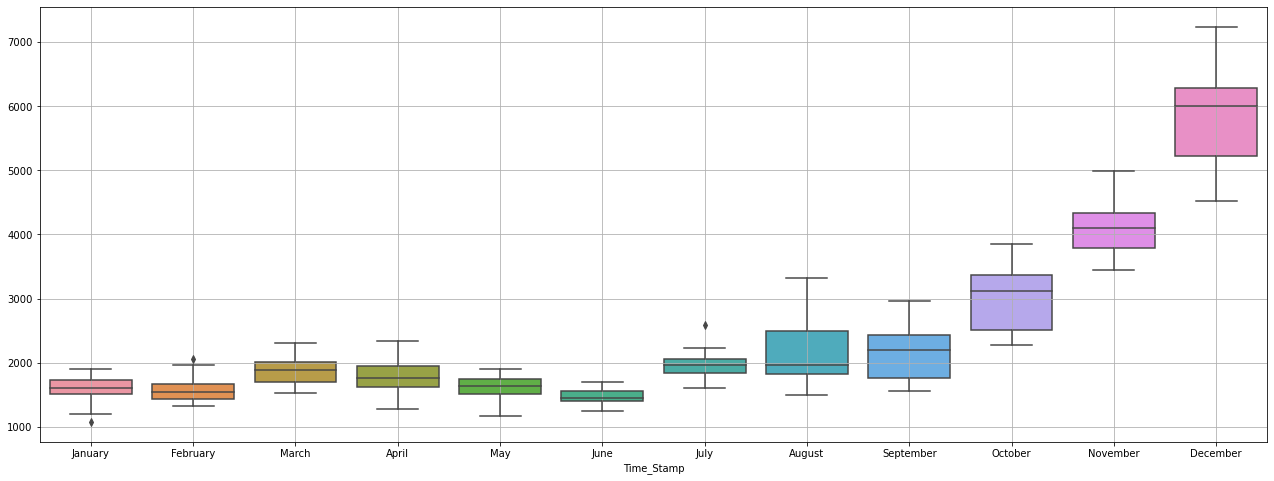

In [37]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

We see that there is maximum sales in the month of December.

In [40]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


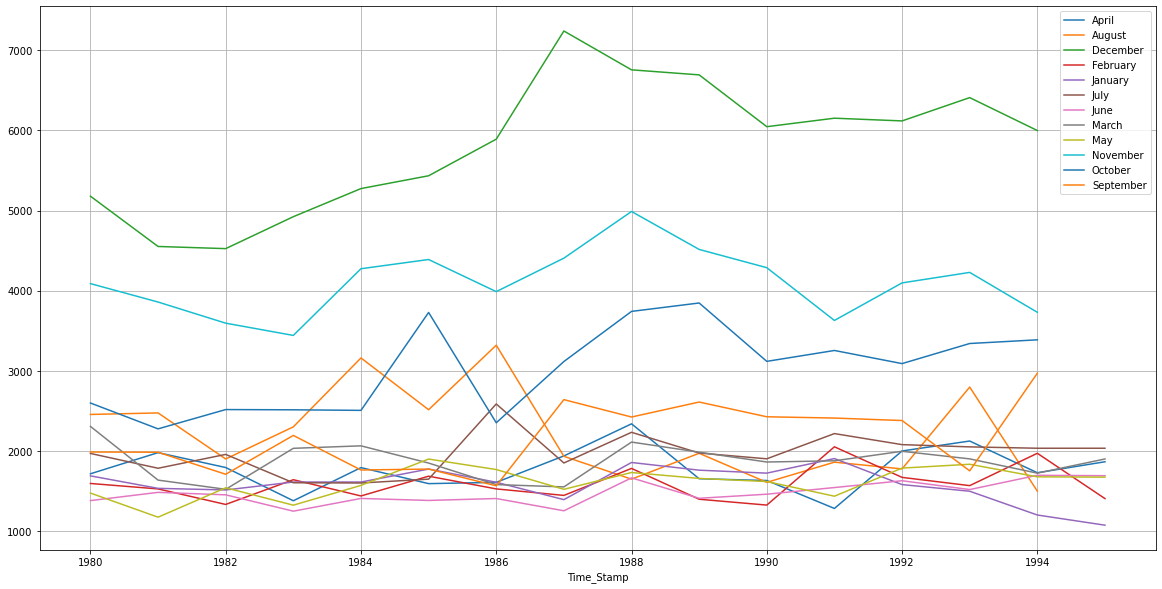

In [41]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that December has the highest sales across years.

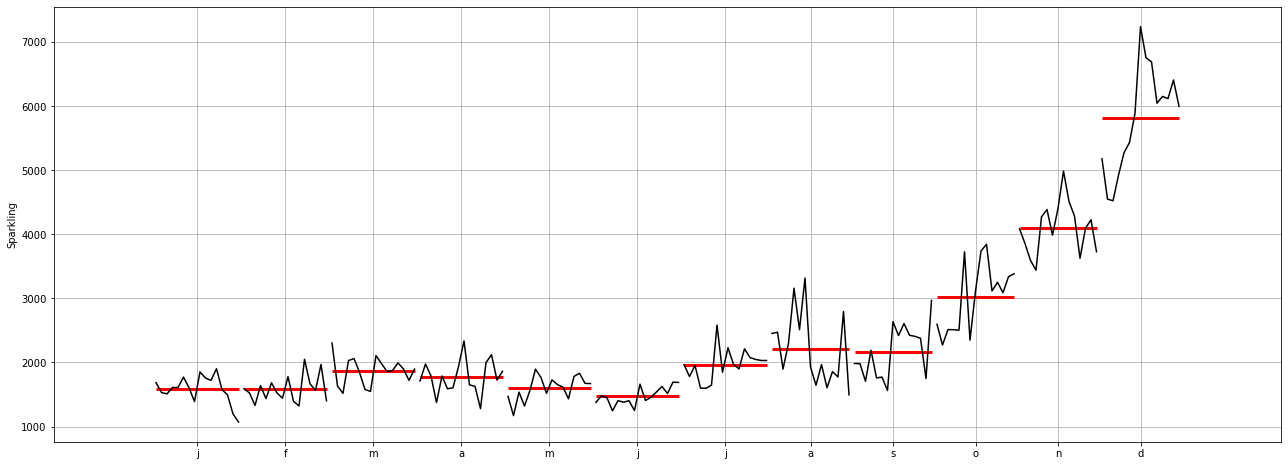

In [43]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Sparkling',ax=ax)
plt.grid();

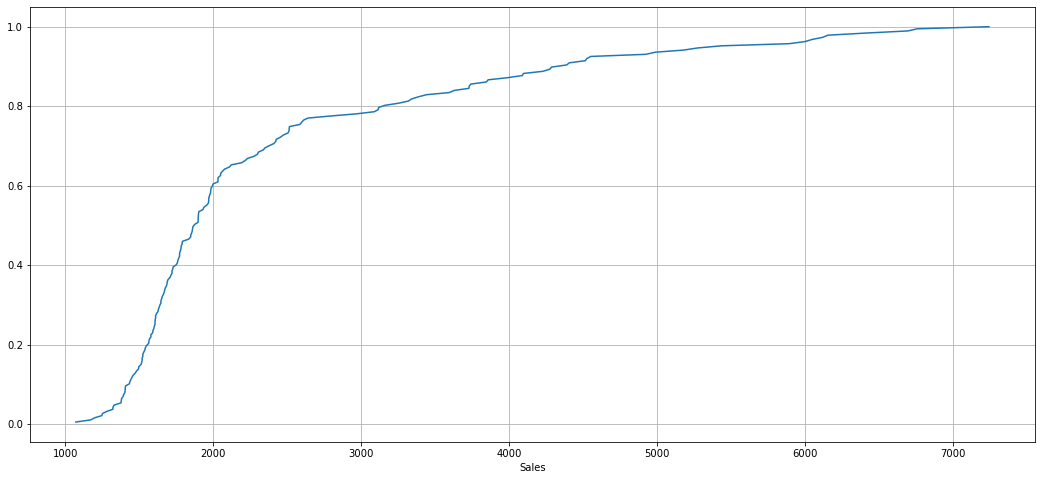

In [44]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

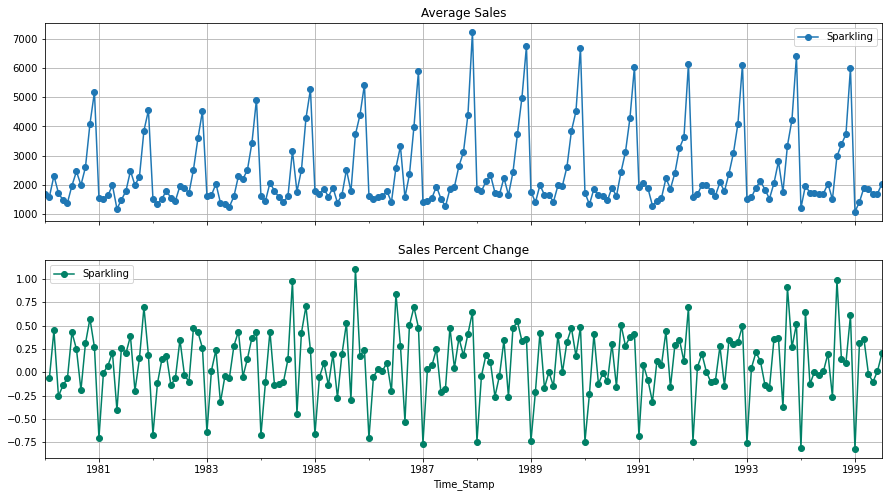

In [45]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

# Decompose the Time Series

In [47]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

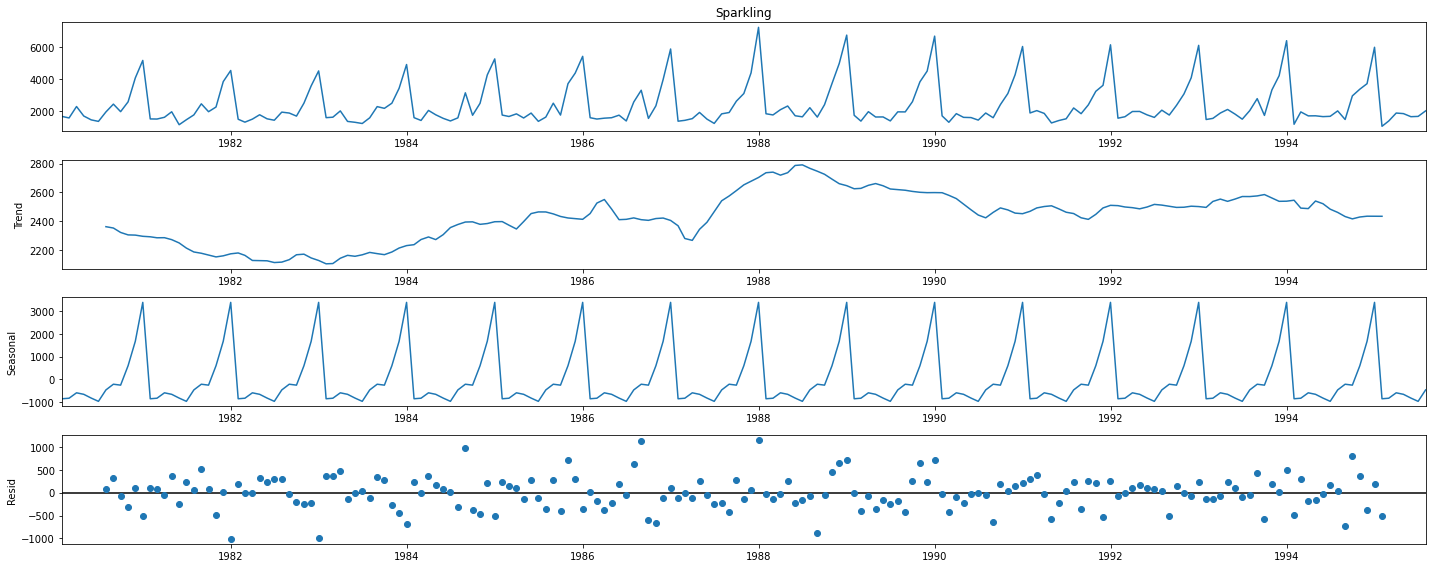

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [52]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(5),'\n')
print('Seasonality','\n',seasonality.head(5),'\n')
print('Residual','\n',residual.head(5),'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: resid, dtype: float64 



### Multiplicative Decomposition

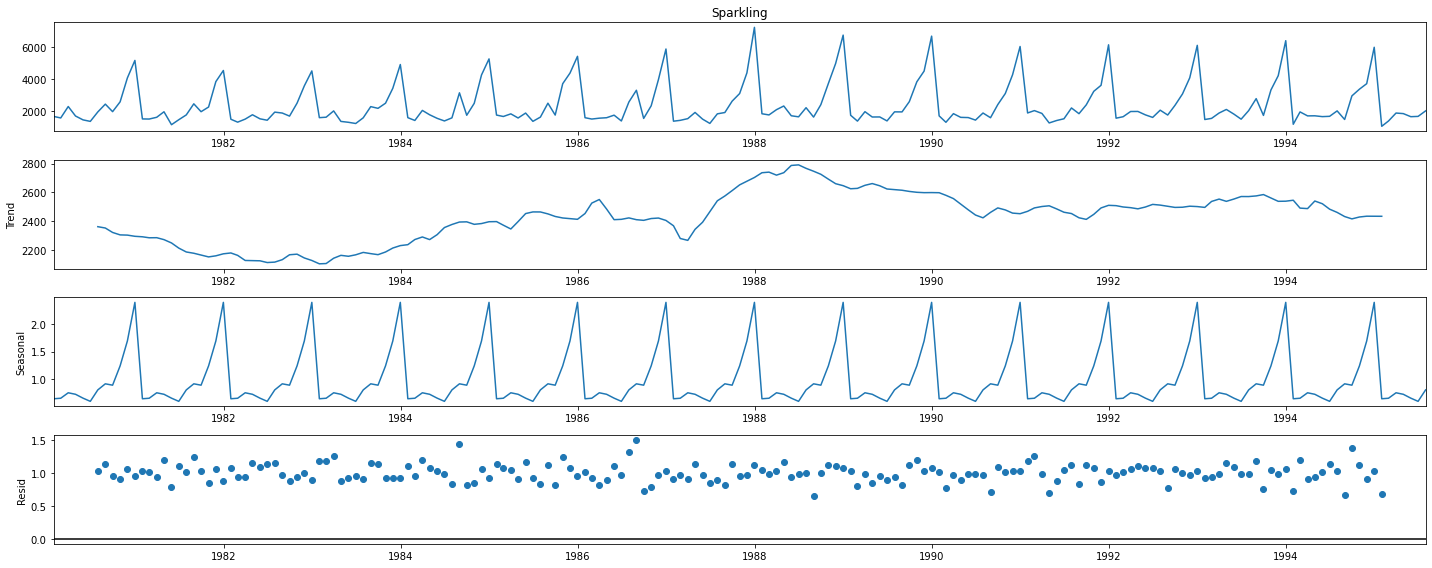

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [56]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(5),'\n')
print('Seasonality','\n',seasonality.head(5),'\n')
print('Residual','\n',residual.head(5),'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: resid, dtype: float64 



In [66]:
## Split the data into train and test 

In [220]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [221]:
print('Shape of Training Data','\n',train.shape,'\n')
print('Shape of Testing Data','\n',test.shape,'\n')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of Training Data 
 (132, 1) 

Shape of Testing Data 
 (55, 1) 

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



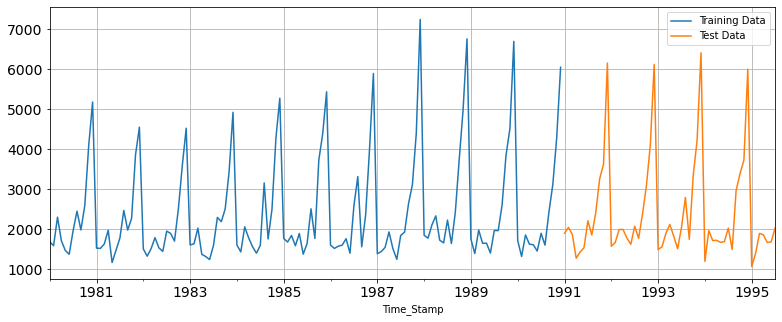

In [222]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics.

In [223]:
## Model 1: Linear Regression

In [224]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [225]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [226]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [227]:
from sklearn.linear_model import LinearRegression

In [228]:
lr = LinearRegression()

In [229]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

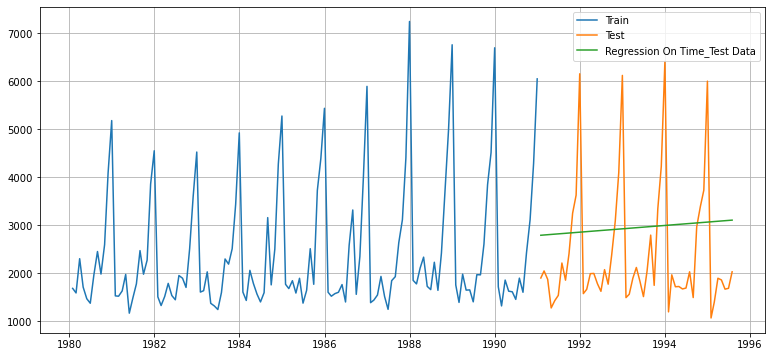

In [230]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [231]:
from sklearn import metrics

In [232]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [329]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


In [330]:
## Model 2: Naive Approach

In [331]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [332]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]

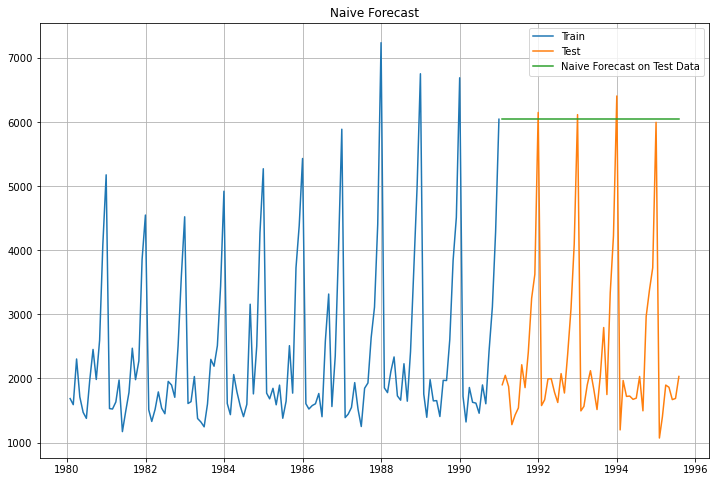

In [333]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [334]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [335]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


In [336]:
## Method 3: Simple Average

In [337]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [338]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()

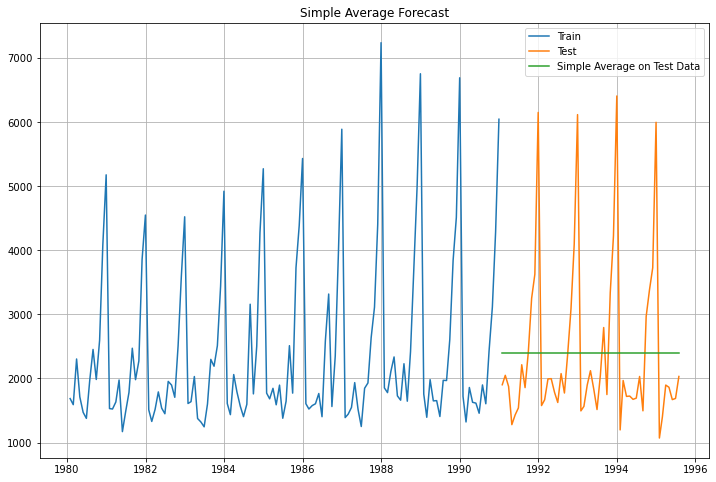

In [339]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [340]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [341]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


## Method:Simple Exponential Smoothing

In [342]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [343]:
SES_train = train.copy()
SES_test = test.copy()

In [344]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [345]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [346]:
model_SES_autofit.params

{'smoothing_level': 0.049606598807459476,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435326,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [347]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))

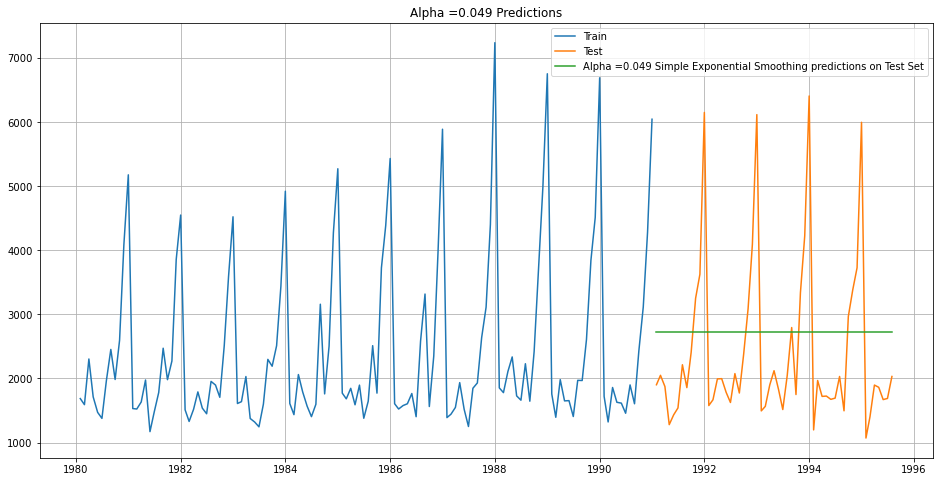

In [348]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

In [349]:
rmse_model4_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_1))

For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [350]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_1]},index=['Alpha=0.049,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.049,SimpleExponentialSmoothing",1316.034674


In [351]:

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [352]:
for i in np.arange(0.00,1,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [353]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
1,0.05,1318.429335,1316.411742
2,0.10,1333.873836,1375.393398
0,0.00,1483.667178,1460.954675
3,0.15,1347.521016,1466.203651
4,0.20,1356.042987,1595.206839
5,0.25,1359.701408,1755.488175
6,0.30,1359.511747,1935.507132
7,0.35,1356.733677,2123.914871
8,0.40,1352.588879,2311.919615
9,0.45,1348.095362,2493.786514


## Method : Double Exponential Smoothing (Holt's Model)

In [354]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)



Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999994, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [355]:
DES_predict =  model_DES.forecast(len(test))

In [356]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.8798332269125


In [357]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.66,Beta=0.0001:Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.049,SimpleExponentialSmoothing",1316.034674
"Alpha=0.66,Beta=0.0001:Double Exponential Smoothing",5291.879833


In [358]:
DES_train = train.copy()
DES_test = test.copy()

In [359]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [360]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [361]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [362]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,18259.110704
8,0.4,0.3,1569.338606,23878.496940
1,0.3,0.4,1682.573828,26069.841401
16,0.5,0.3,1530.575845,27095.532414
24,0.6,0.3,1506.449870,29070.722592


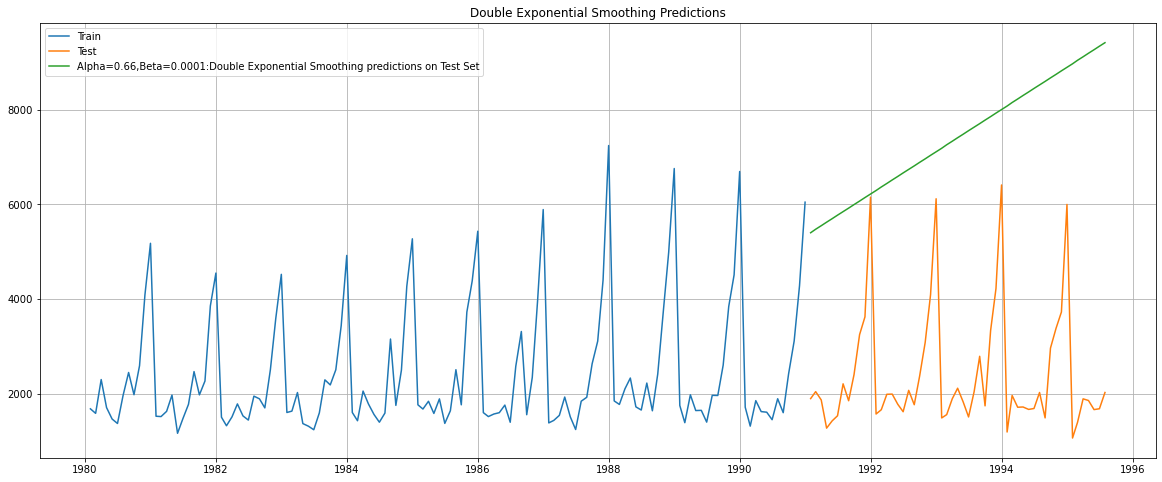

In [363]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

## Method : Triple Exponential Smoothing (Holt - Winter's Model)

In [364]:
TES_train = train.copy()
TES_test = test.copy()

In [365]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [366]:
model_TES_autofit = model_TES.fit()

In [367]:
model_TES_autofit.params

{'smoothing_level': 0.11107239027962708,
 'smoothing_trend': 0.06170690840063879,
 'smoothing_seasonal': 0.3950788533398138,
 'damping_trend': nan,
 'initial_level': 1640.0000227337534,
 'initial_trend': -15.109117866354758,
 'initial_seasons': array([1.03477093, 0.98983304, 1.40590614, 1.20095615, 0.93935299,
        0.95195895, 1.29601204, 1.67980732, 1.35784914, 1.79340754,
        2.82843248, 3.60163829]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [368]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))

In [369]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.593


In [370]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.049,SimpleExponentialSmoothing",1316.034674
"Alpha=0.66,Beta=0.0001:Double Exponential Smoothing",5291.879833
"Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing",469.593384


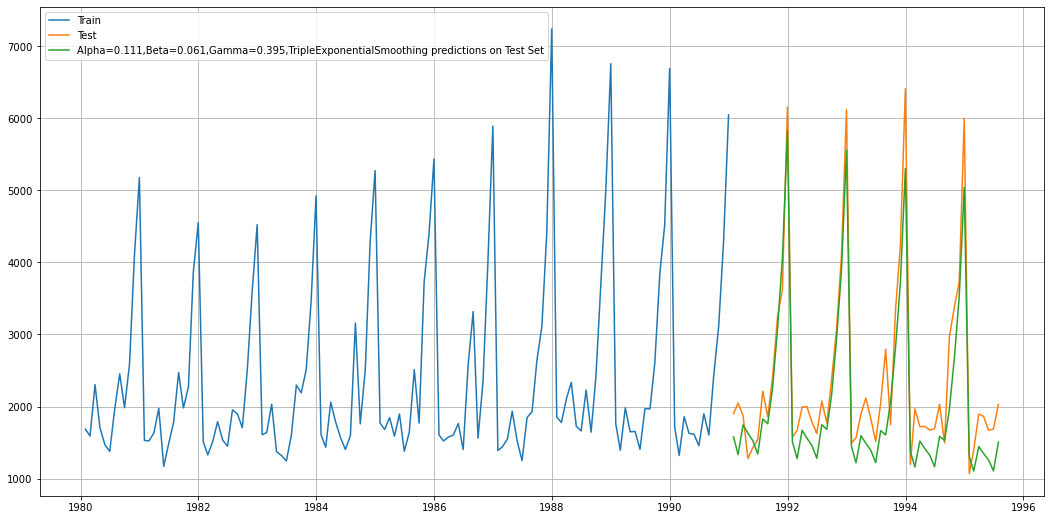

In [371]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [372]:

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})


In [373]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [374]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,404.513320,392.786198
8,0.3,0.4,0.3,424.828055,410.854547
65,0.4,0.3,0.4,435.553595,421.409170
296,0.7,0.8,0.3,700.317756,518.188752
130,0.5,0.3,0.5,498.239915,542.175497


In [375]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.049,SimpleExponentialSmoothing",1316.034674
"Alpha=0.66,Beta=0.0001:Double Exponential Smoothing",5291.879833
"Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing",469.593384
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198


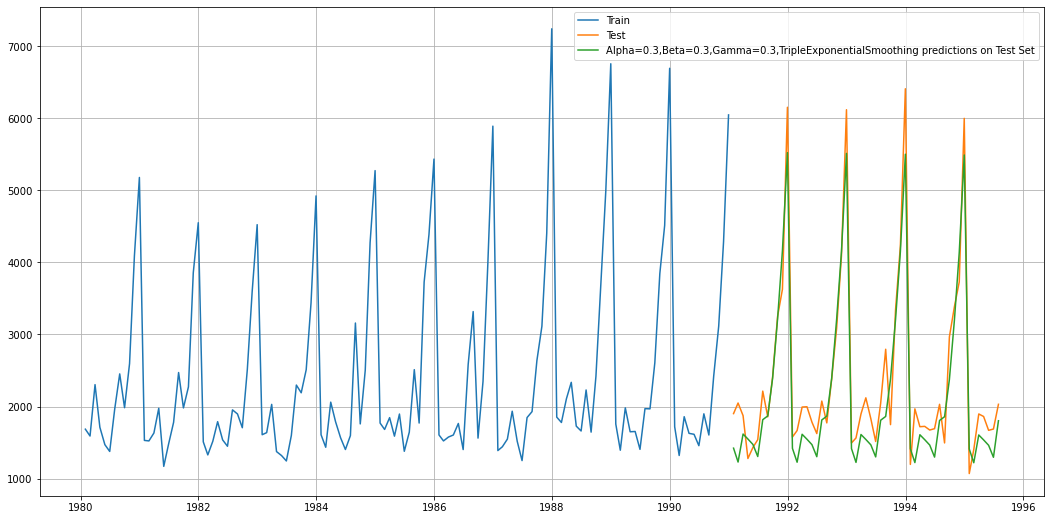

In [376]:

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## Check for stationarity of the whole Time Series data.

In [377]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

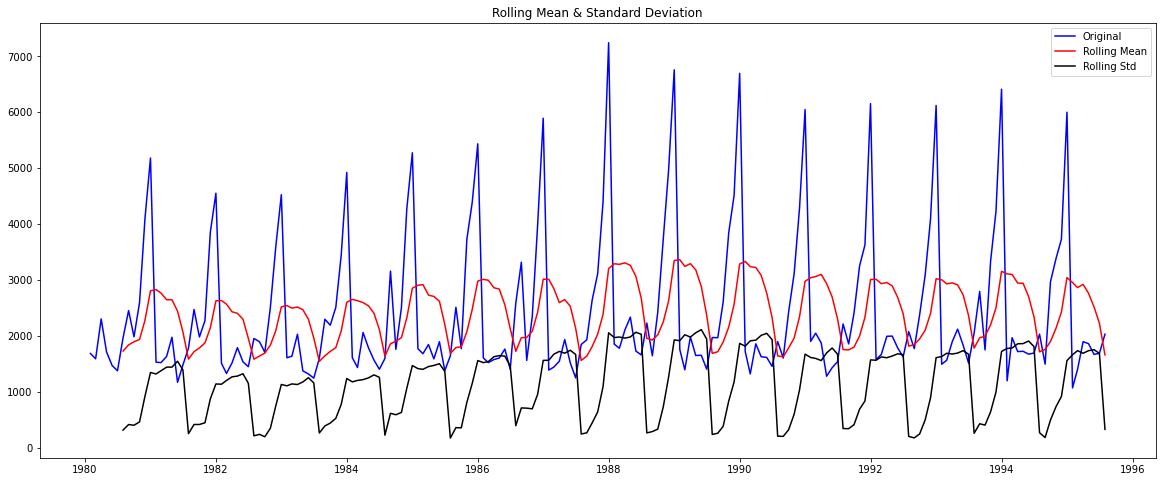

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [378]:
test_stationarity(df['Sparkling'])

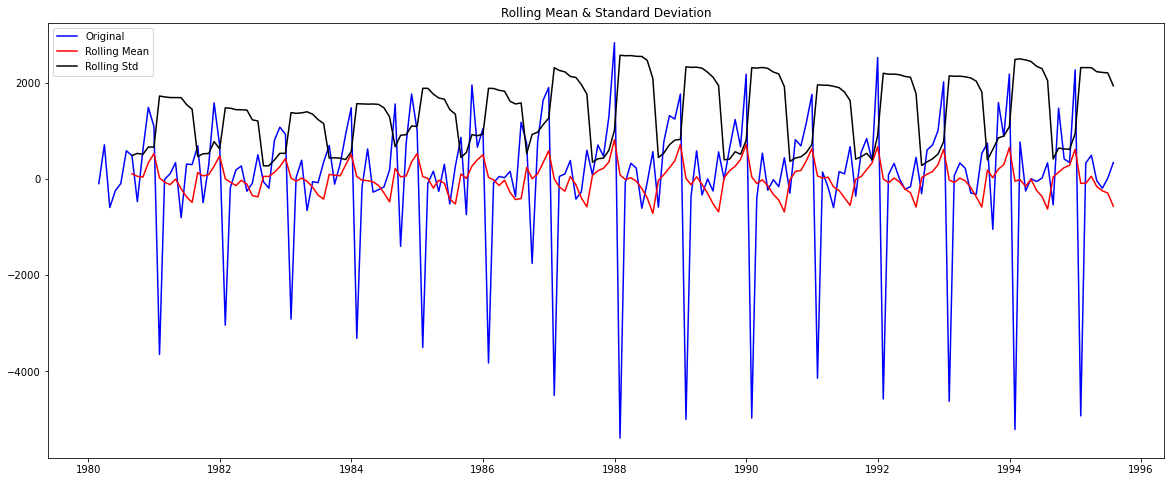

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [379]:
test_stationarity(df['Sparkling'].diff().dropna())

## Check for stationarity of the Training Data Time Series.

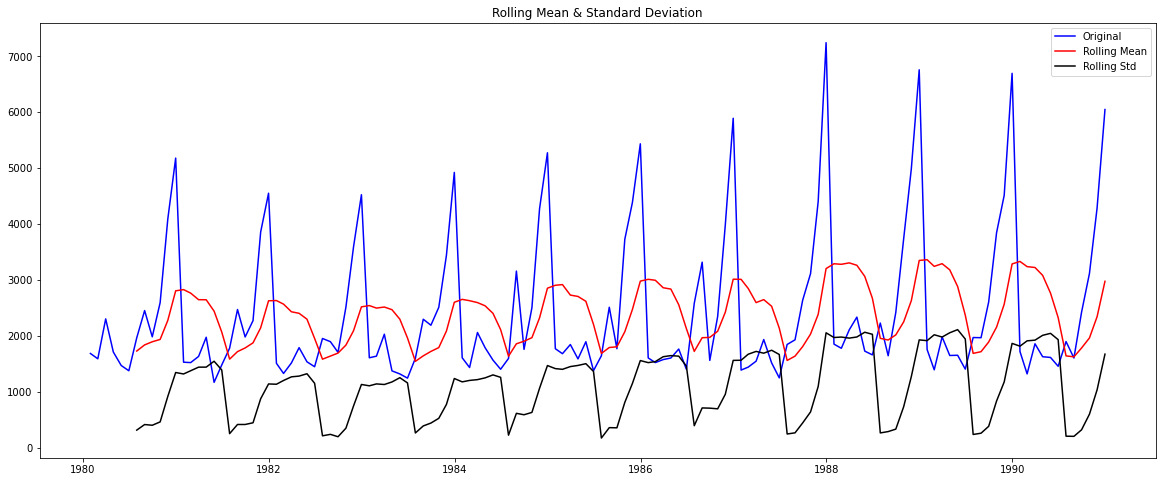

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [380]:
test_stationarity(train['Sparkling'])

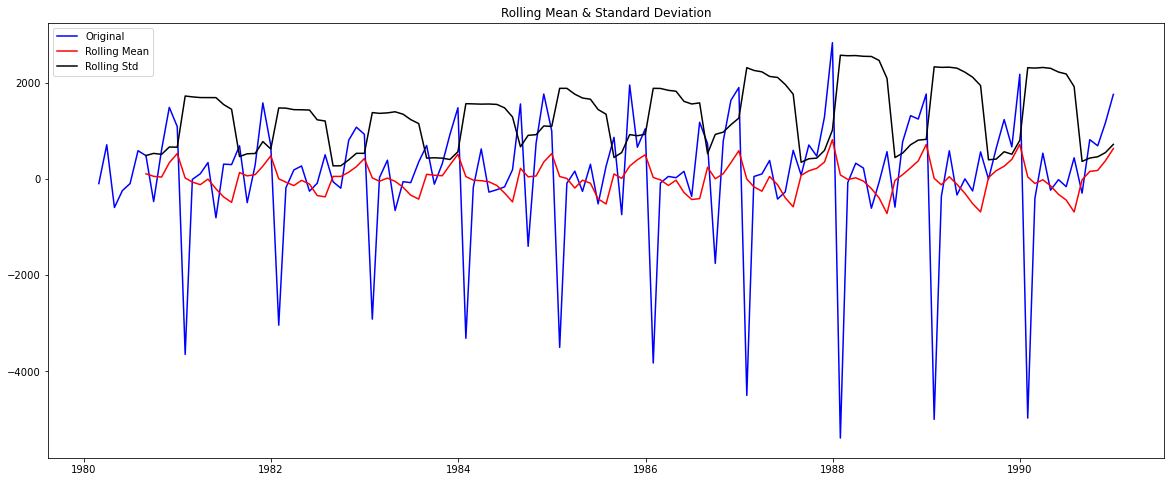

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [381]:
test_stationarity(train['Sparkling'].diff().dropna())

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [382]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

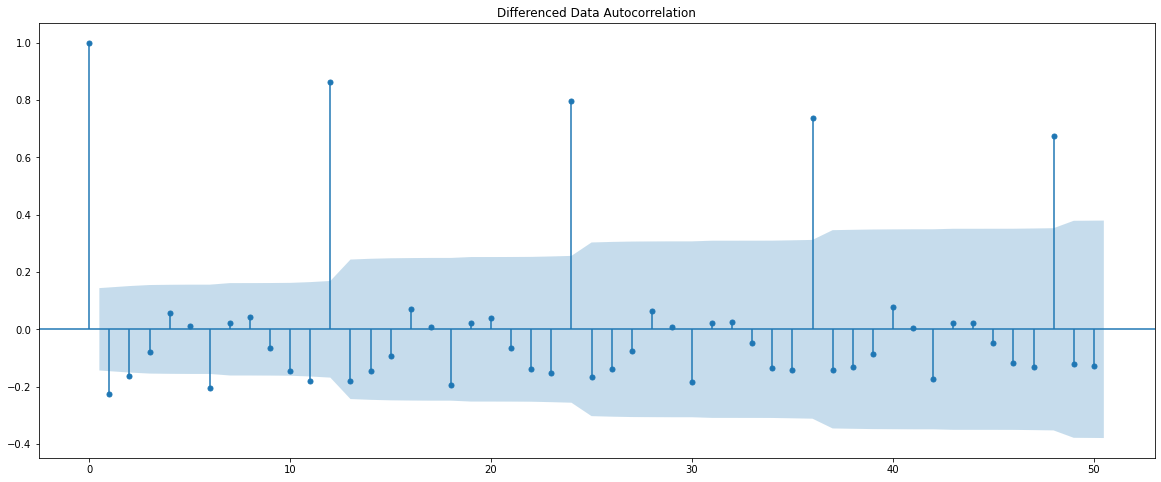

In [383]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [384]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [385]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [386]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171631
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689147
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844430662
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111229876
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751069
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780566193
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082793
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.18763395401
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785636
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813841
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274341191
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103987035
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933251297
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6414775362275
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1908.3347839352996
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.564551026982
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1987.147698865012
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1838.975595458151
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1773.4229389343343
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1775.258400254448
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1727.6708655540572
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:2145.3576991201085
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.156142608302
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2124.90717863182
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2054.1700712291704
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.633692251132
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1782.7357821012044
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1782.3598160204858
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1760.3426710444842
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2199.858613145455
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2103.0859058222904
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:190

In [387]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.670866
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888818
80,"(2, 1, 2)","(2, 0, 2, 6)",1729.192582
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.641478
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379778


In [388]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 20 Dec 2020   AIC                           1727.671
Time:                                   17:24:50   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6451      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3355      0.227     -1.475

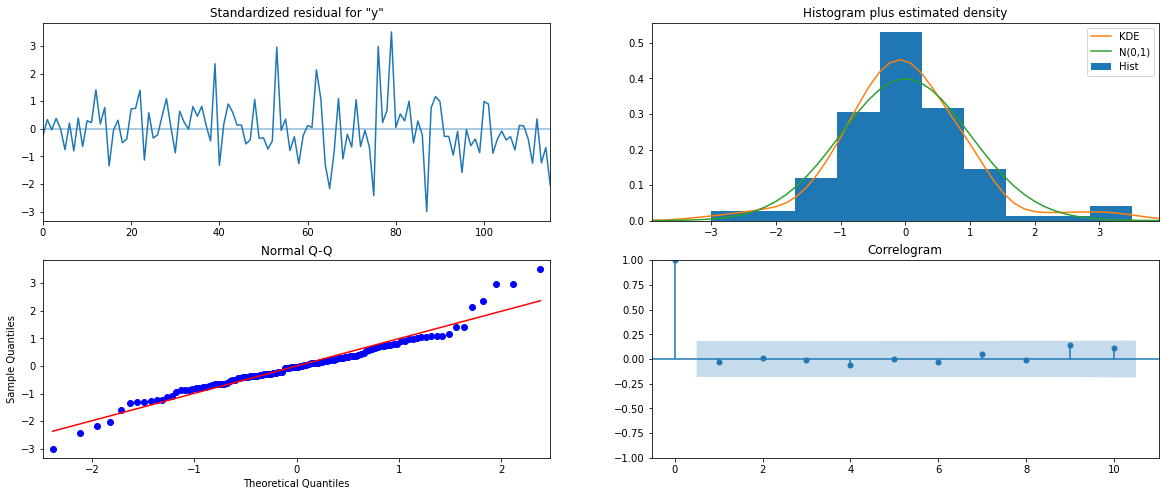

In [389]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [390]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [391]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1330.347607,380.569348,584.445390,2076.249823
1,1177.284748,392.119860,408.743945,1945.825551
2,1625.868709,392.314443,856.946530,2394.790887
3,1546.370547,397.718345,766.856914,2325.884179
4,1308.633296,398.937917,526.729347,2090.537244


In [392]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.898232625206


In [393]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.049,SimpleExponentialSmoothing",1316.034674
"Alpha=0.66,Beta=0.0001:Double Exponential Smoothing",5291.879833
"Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing",469.593384
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
"SARIMA(1,1,2)(2,0,2,6)",626.898233


In [ ]:
### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [394]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [395]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [396]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845235
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235916
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389947
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791878
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158602903
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920795
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566528
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572892257
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183879
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193786773
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319654622398
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954174845
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.22450939983
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824628909
SARIMA(0, 1, 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191733294065
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145455
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495422416
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080334736
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429067091
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125280635
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888302467562
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060897595
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.159585016411
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428632283253
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681146070703
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372609929569
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433538604
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931244946
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086050916356
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404024601964
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0455911409174
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476006564168
SARIMA(2, 1, 2

In [397]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.929659
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [398]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 20 Dec 2020   AIC                           1555.584
Time:                                    17:31:56   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

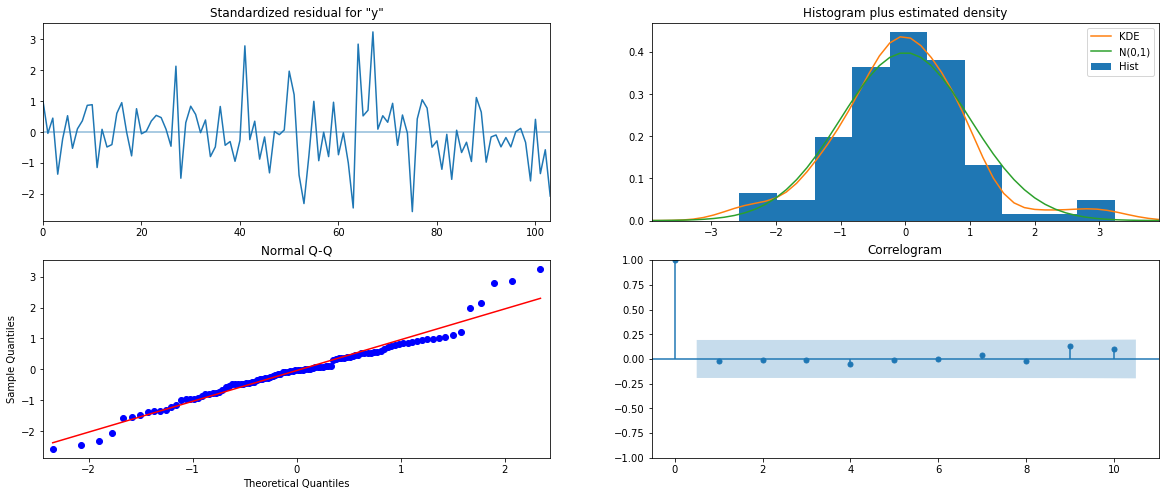

In [399]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [400]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [401]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.386418,388.344800,566.244597,2088.528239
1,1315.110768,402.007729,527.190097,2103.031440
2,1621.588857,402.001336,833.680717,2409.496997
3,1598.867465,407.239037,800.693619,2397.041311
4,1392.688227,407.969106,593.083472,2192.292982


In [402]:
rmse1 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse1)

528.6213088960798


In [403]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE': [rmse1]},index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf1])

resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.049,SimpleExponentialSmoothing",1316.034674
"Alpha=0.66,Beta=0.0001:Double Exponential Smoothing",5291.879833
"Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing",469.593384
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
"SARIMA(1,1,2)(2,0,2,6)",626.898233
"SARIMA(1,1,2)(1,0,2,12)",528.621309


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


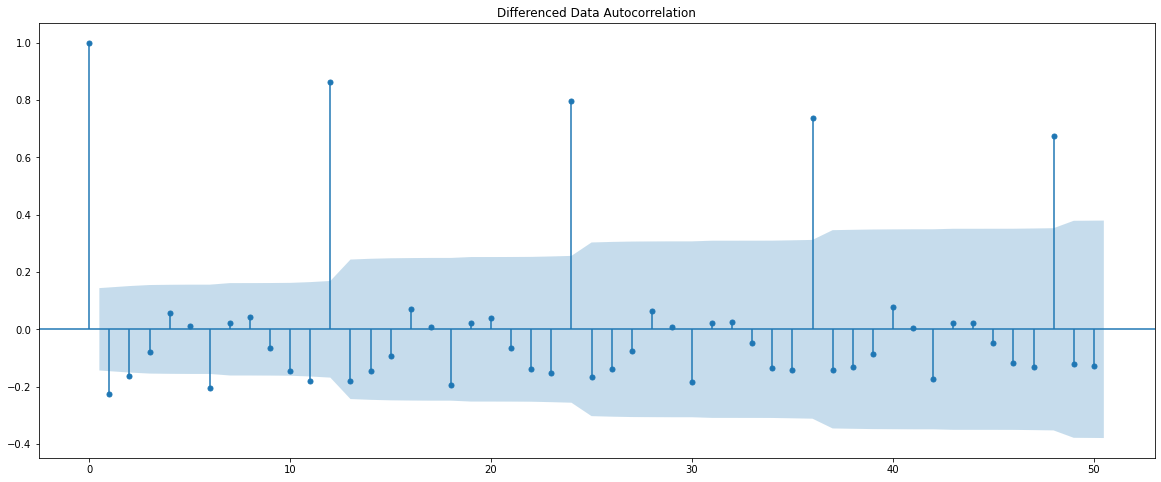

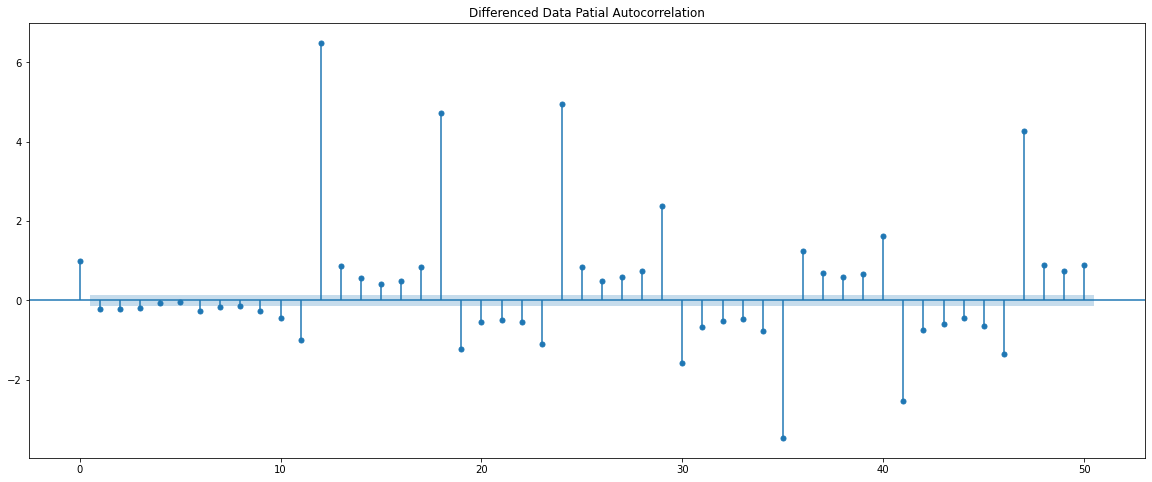

In [405]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

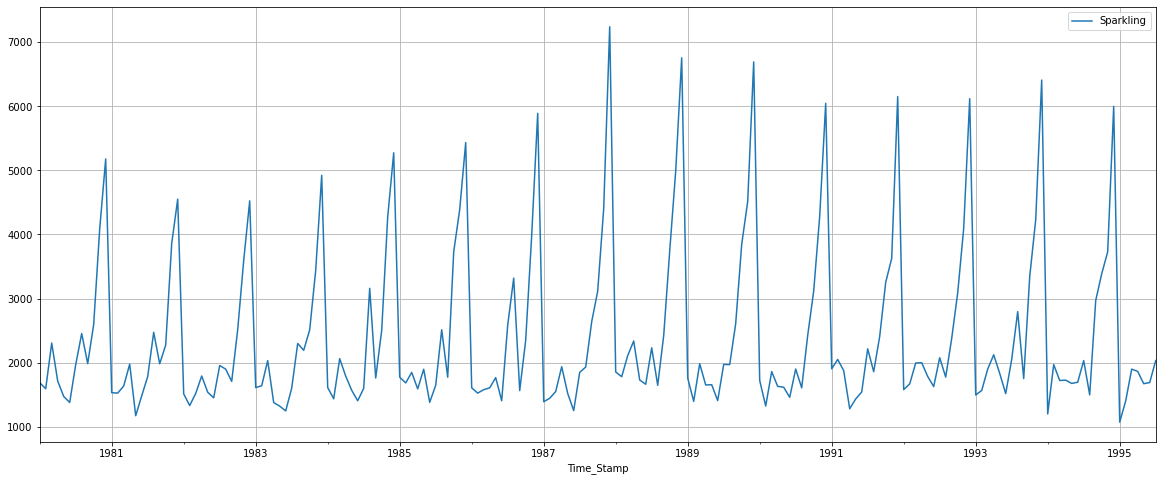

In [406]:
df.plot()
plt.grid();

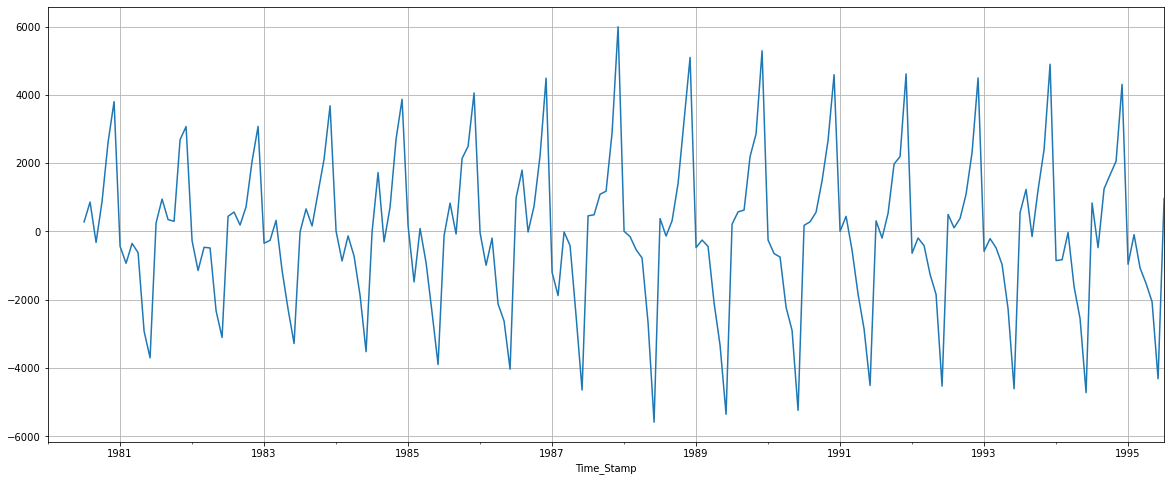

In [407]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

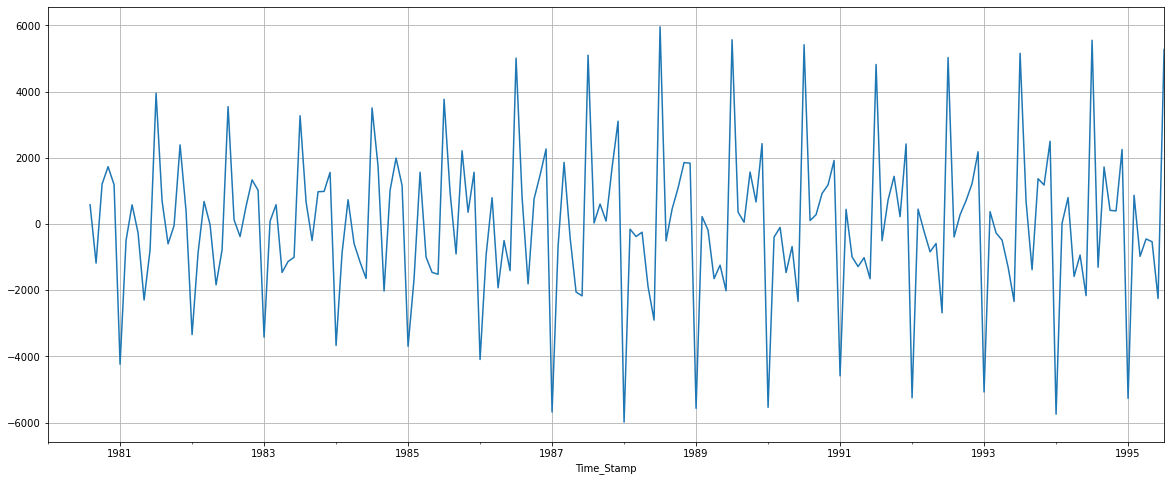

In [409]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

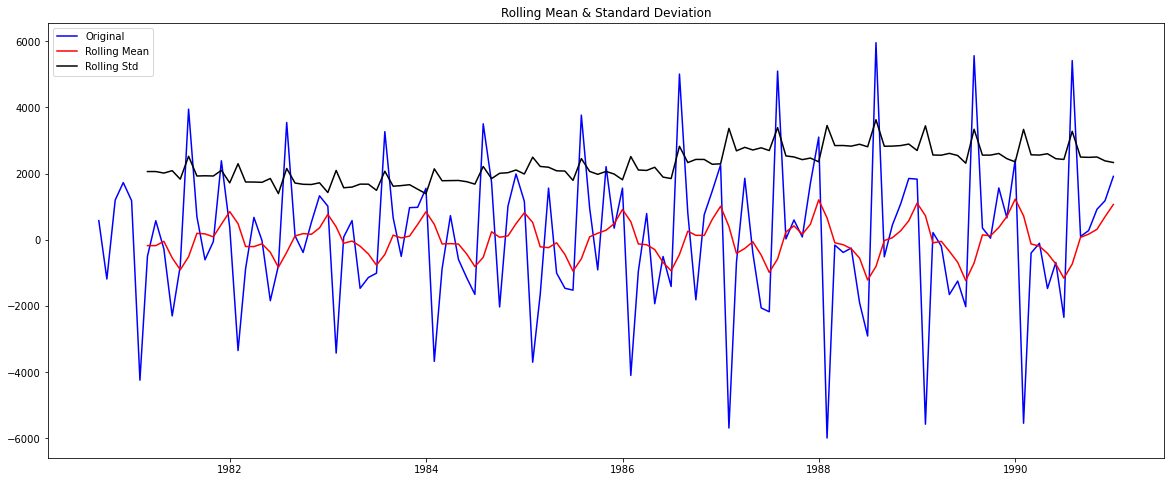

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [411]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

In [412]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -811.726
Date:                                   Sun, 20 Dec 2020   AIC                           1633.452
Time:                                           17:41:11   BIC                           1646.770
Sample:                                                0   HQIC                          1638.850
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0176      0.015    -68.689      0.000    

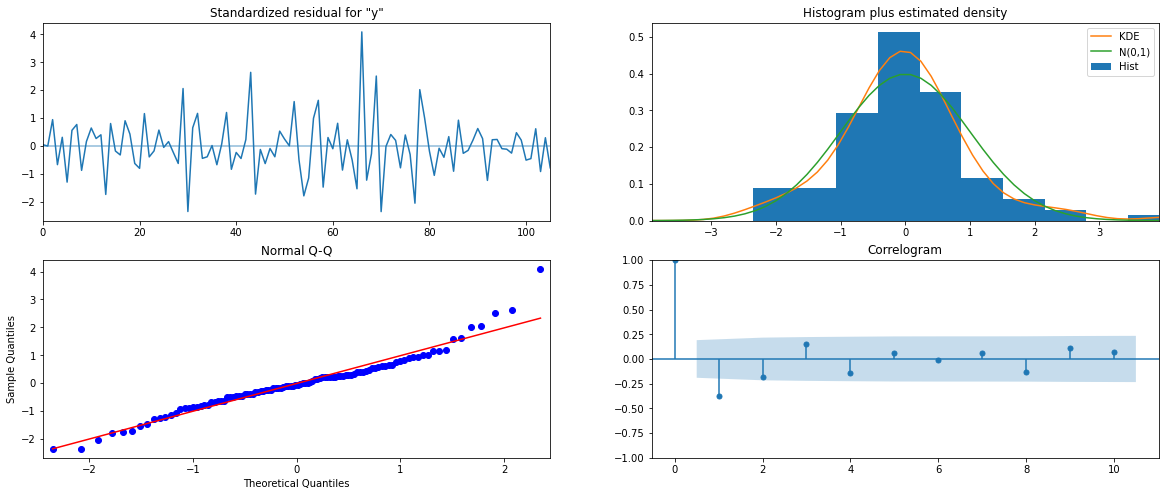

In [413]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [414]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [416]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,907.279810,510.718162,-93.709395,1908.269014
1,529.933946,722.263839,-885.677165,1945.545058
2,1125.400250,884.588642,-608.361629,2859.162129
3,933.686062,1021.434813,-1068.289384,2935.661507
4,743.479226,1141.998725,-1494.797146,2981.755598


In [417]:
rmse3 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse3)

1914.9578518202625


In [418]:
temp_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse3]},index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf2])

resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.049,SimpleExponentialSmoothing",1316.034674
"Alpha=0.66,Beta=0.0001:Double Exponential Smoothing",5291.879833
"Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing",469.593384
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
"SARIMA(1,1,2)(2,0,2,6)",626.898233
"SARIMA(1,1,2)(1,0,2,12)",528.621309
"SARIMA(0,1,0)(1,1,3,6)",1914.957852


In [419]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood               -1625.288
Date:                                    Sun, 20 Dec 2020   AIC                           3260.575
Time:                                            17:46:03   BIC                           3272.609
Sample:                                                 0   HQIC                          3265.407
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4038   9.88e-24  -4.09e+22      0

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


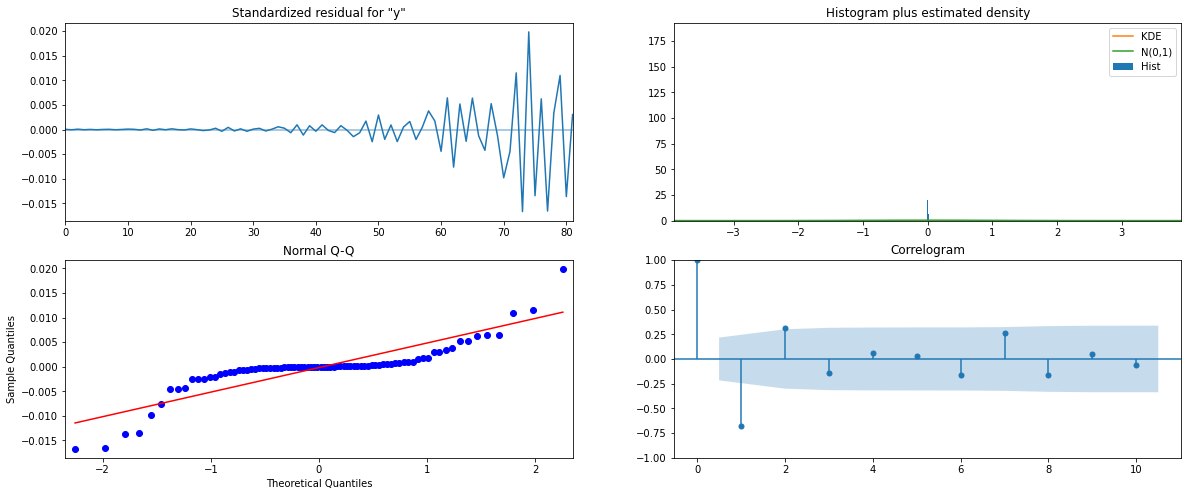

In [420]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [421]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [422]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,-4.124133e+06,1.618357e+08,-3.213162e+08,3.130679e+08
1,-6.007075e+06,2.292322e+08,-4.552940e+08,4.432798e+08
2,-1.170590e+06,2.808986e+08,-5.517218e+08,5.493806e+08
3,-8.184532e+06,3.244390e+08,-6.440733e+08,6.277043e+08
4,1.521619e+05,3.627910e+08,-7.109051e+08,7.112094e+08


In [423]:
rmse4 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse4)

14544670.973723546


In [424]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.3)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [425]:
RMSE_fullmodel = metrics.mean_squared_error(df['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 422.28442925142383


In [431]:
prediction = fullmodel.forecast(steps=20)

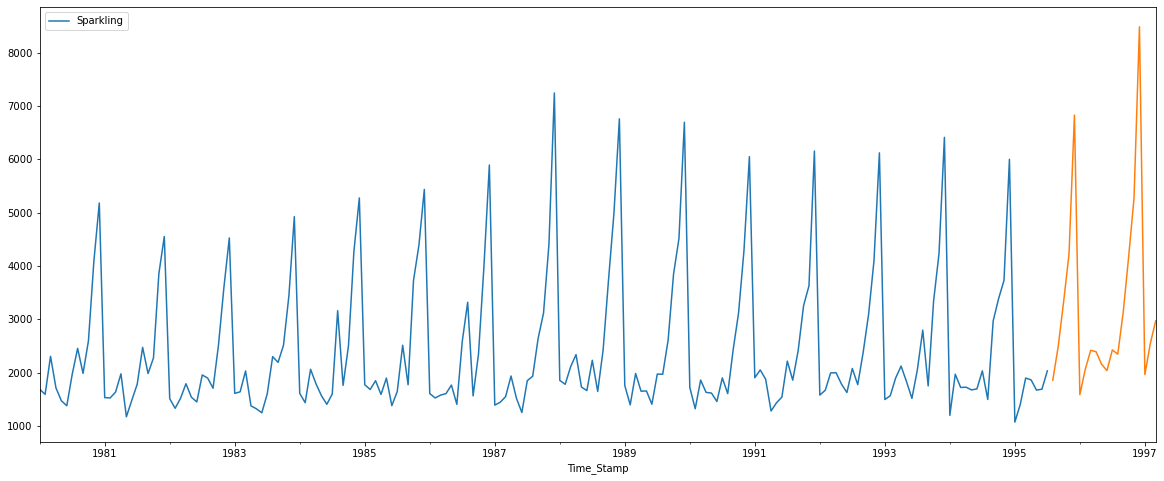

In [432]:
df.plot()
prediction.plot();

In [433]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1025.541131,1855.439826,2685.338521
1995-09-30,1656.976007,2486.874702,3316.773397
1995-10-31,2493.261044,3323.159740,4153.058435
1995-11-30,3395.278907,4225.177602,5055.076298
1995-12-31,5998.104872,6828.003567,7657.902262


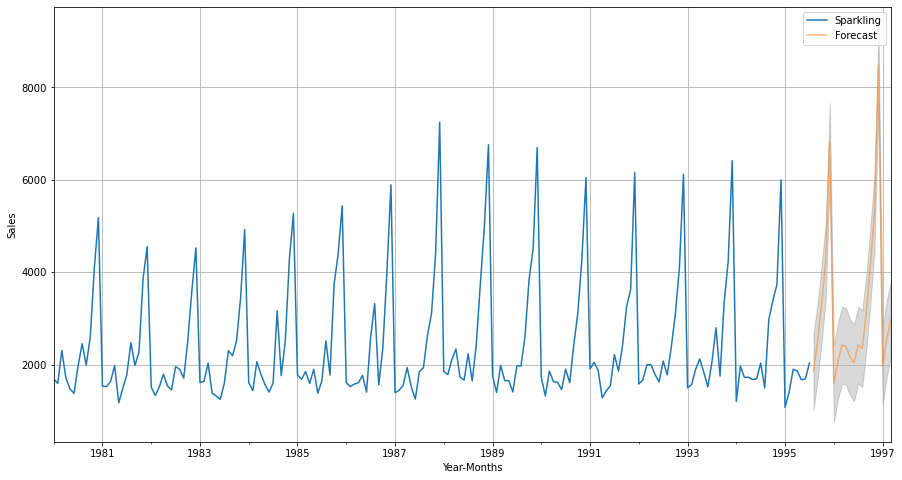

In [434]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()